In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 512
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 1/10000]
I = [0.1, 1/10000]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 0.0001, 0.0001, 0.0001


#####################################
Running one sample t-tes

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


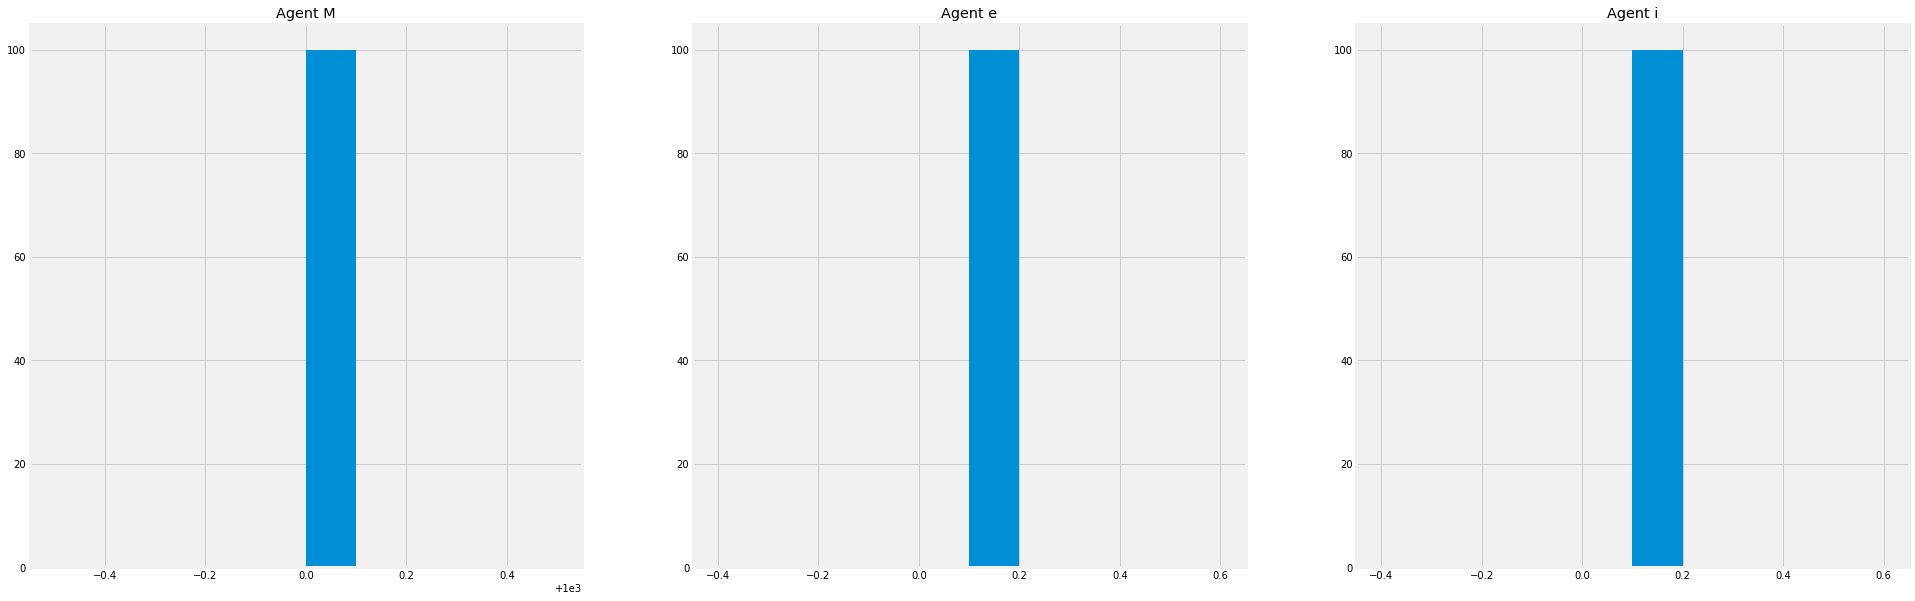

In [3]:
check_parameters(agents, M, E, I)

In [4]:
seed512_mm1000_me01_mi01_sdm0_sde0_sdi0 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 109 minutes.


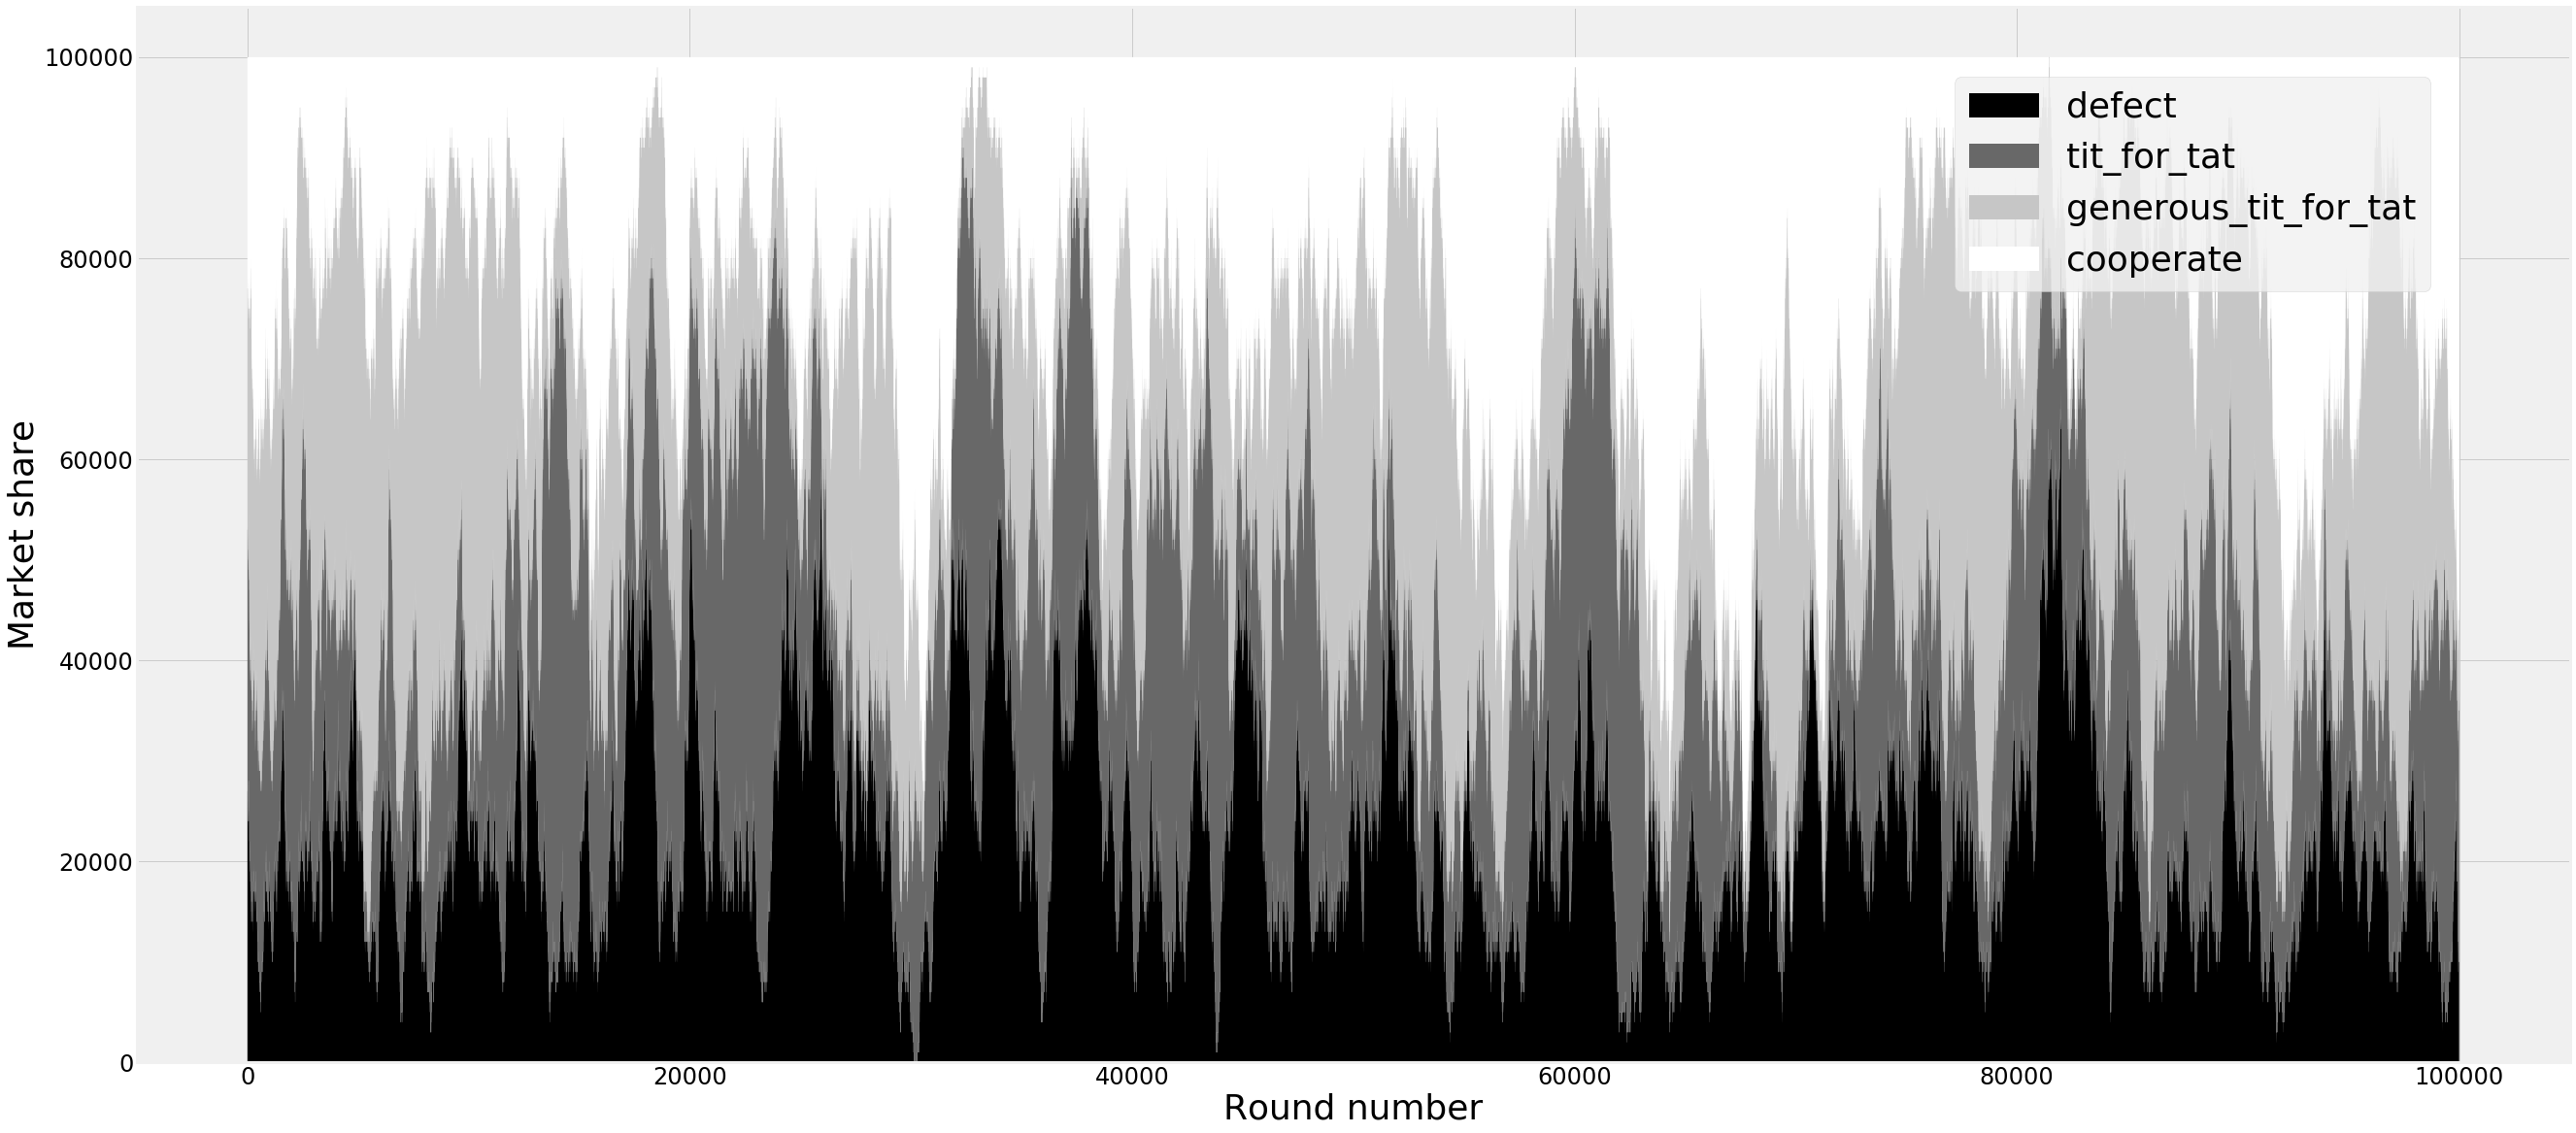

In [5]:
draw_stack(seed512_mm1000_me01_mi01_sdm0_sde0_sdi0)

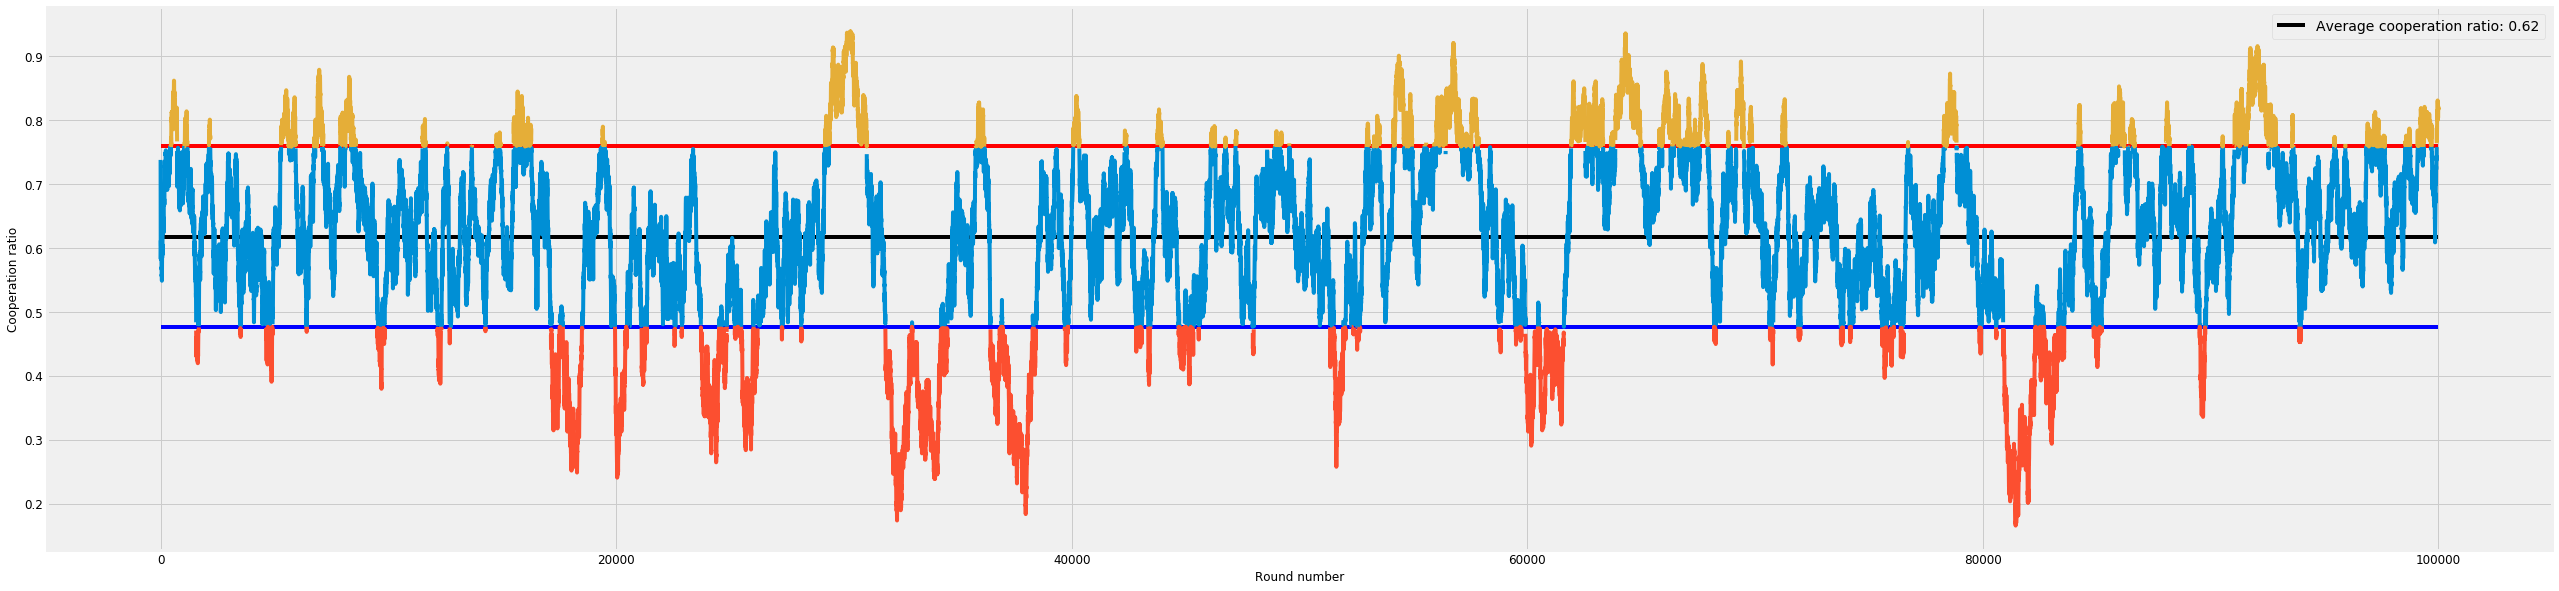

In [6]:
C_D_ratios_per_round_var(seed512_mm1000_me01_mi01_sdm0_sde0_sdi0, constant = 1)

In [7]:
outliers = count_outliers(seed512_mm1000_me01_mi01_sdm0_sde0_sdi0, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5    1108
1    0.6     950
2    0.7     839
3    0.8     783
4    0.9     769
5    1.0     714
6    1.1     623
7    1.2     565
8    1.3     515
9    1.4     398
10   1.5     278
11   1.6     229
12   1.7     216
13   1.8     192
14   1.9     174
15   2.0     152
16   2.1      95
17   2.2      94
18   2.3      94
19   2.4      81
20   2.5      42
21   2.6      33
22   2.7      24
23   2.8      20
24   2.9      20
25   3.0      19


In [8]:
save_cooperate_csv(seed512_mm1000_me01_mi01_sdm0_sde0_sdi0, type_of_tournament= "seed512_mm1000_me01_mi01_sdm0_sde0_sdi0", seed = str(seed))